In [1]:
import re
import nltk
import pickle
import pandas as pd
import numpy as np
import requests
import joblib

In [2]:
# Data processing
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer

In [4]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [5]:
# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from PIL import Image
from wordcloud import WordCloud,  ImageColorGenerator

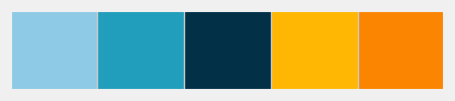

In [7]:
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")

###Importing the Dataset:###

In [8]:
import pandas as pd
data = pd.read_csv(r'C:\Users\rahul\OneDrive\Desktop\artificial Intelligence\amazon_review_full_csv/train.csv', header=None)
data.head(10)

,0,1,2
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...
5,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,4,"Errors, but great story",I was a dissapointed to see errors on the back...
8,1,The Worst!,A complete waste of time. Typographical errors...
9,1,Oh please,I guess you have to be a romance novel lover f...


In [9]:
data.shape

(3000000, 3)

### Modifying the Dataset:
We first name the columns as "Rating", "Title" and "Review".###

In [10]:
print(data.columns)

Index([0, 1, 2], dtype='int64')


In [11]:
data.columns = ["Rating", "Title", "Review"]

In [12]:
data["Review"] = data["Title"] + " " + data["Review"]
data = data[['Review', 'Rating']]
data.head()

,Review,Rating
0,more like funchuck Gave this to my dad for a g...,3
1,Inspiring I hope a lot of people hear this cd....,5
2,The best soundtrack ever to anything. I'm read...,5
3,Chrono Cross OST The music of Yasunori Misuda ...,4
4,Too good to be true Probably the greatest soun...,5


In [13]:

data.head()

,Review,Rating
0,more like funchuck Gave this to my dad for a g...,3
1,Inspiring I hope a lot of people hear this cd....,5
2,The best soundtrack ever to anything. I'm read...,5
3,Chrono Cross OST The music of Yasunori Misuda ...,4
4,Too good to be true Probably the greatest soun...,5


The sentiment to each review is added by considering a rating above 3 as "Positive", below 3 as "Negative" and equal to 3 as "Neutral".

In [14]:
def sentiment(label):
    if label<3:
        return "Negative"
    elif label>3:
        return "Positive"
    else:
        return "Neutral"

In [15]:
data['Sentiment'] = data["Rating"].apply(sentiment)
data.head(10)

,Review,Rating,Sentiment
0,more like funchuck Gave this to my dad for a g...,3,Neutral
1,Inspiring I hope a lot of people hear this cd....,5,Positive
2,The best soundtrack ever to anything. I'm read...,5,Positive
3,Chrono Cross OST The music of Yasunori Misuda ...,4,Positive
4,Too good to be true Probably the greatest soun...,5,Positive
5,There's a reason for the price There's a reaso...,5,Positive
6,"Buyer beware This is a self-published book, an...",1,Negative
7,"Errors, but great story I was a dissapointed t...",4,Positive
8,The Worst! A complete waste of time. Typograph...,1,Negative
9,Oh please I guess you have to be a romance nov...,1,Negative


Data Analysis:

In [16]:
data.shape

(3000000, 3)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Review     object
 1   Rating     int64 
 2   Sentiment  object
dtypes: int64(1), object(2)
memory usage: 68.7+ MB


In [18]:
data.value_counts("Rating")

Rating
1    600000
2    600000
3    600000
4    600000
5    600000
Name: count, dtype: int64

In [19]:
data.value_counts("Sentiment")

Sentiment
Negative    1200000
Positive    1200000
Neutral      600000
Name: count, dtype: int64

C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\2359462227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data,  palette=["#f8de7e","#32fa53",'#fa3232'])


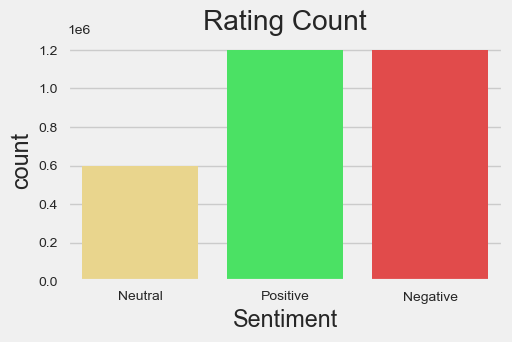

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(x="Sentiment", data=data,  palette=["#f8de7e","#32fa53",'#fa3232'])
plt.title("Rating Count")
plt.show()

In [21]:
data["Rating"].value_counts()/len(data)

Rating
3    0.2
5    0.2
4    0.2
1    0.2
2    0.2
Name: count, dtype: float64

In [22]:
data["Sentiment"].value_counts()/len(data)

Sentiment
Positive    0.4
Negative    0.4
Neutral     0.2
Name: count, dtype: float64

In [23]:
data.isna().sum()

Review       188
Rating         0
Sentiment      0
dtype: int64

In [24]:
data = data.fillna(' ')
data.isna().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

Number of characters present in each Review:

Here I range the number of characters by 500 chars and so on.

In [25]:
import numpy as np
text_len = data['Review'].groupby(pd.cut(data['Review'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()
text_len.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\3054906179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  text_len = data['Review'].groupby(pd.cut(data['Review'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()


,Range,Review
0,"(0, 500]",1911735
1,"(500, 1000]",1071380
2,"(1000, 1500]",16885
3,"(1500, 2000]",0
4,"(2000, 2500]",0


In [26]:
text_len_50 = text_len[text_len['Review'] > 50]
text_len_50

,Range,Review
0,"(0, 500]",1911735
1,"(500, 1000]",1071380
2,"(1000, 1500]",16885


C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\4000903183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot( x=text_len_50['Range'][0:10], y=text_len_50['Review'][0:10], palette=palette)
C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\4000903183.py:2: UserWarning: 
The palette list has fewer values (5) than needed (40) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot( x=text_len_50['Range'][0:10], y=text_len_50['Review'][0:10], palette=palette)
C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\4000903183.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


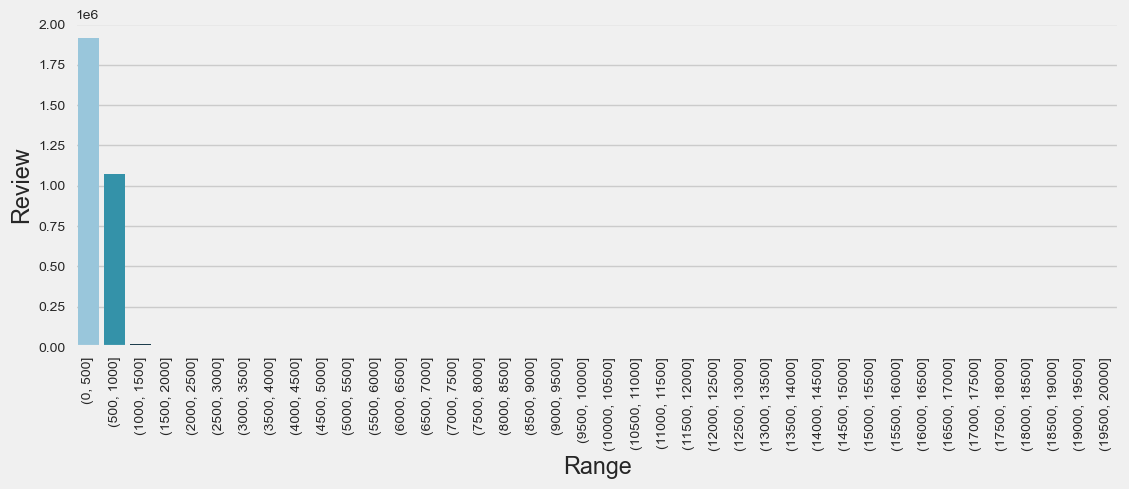

In [27]:
plt.figure(figsize=(12, 4))
g = sns.barplot( x=text_len_50['Range'][0:10], y=text_len_50['Review'][0:10], palette=palette)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_7064\1778809724.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=data['Review'].str.len(), palette=palette)


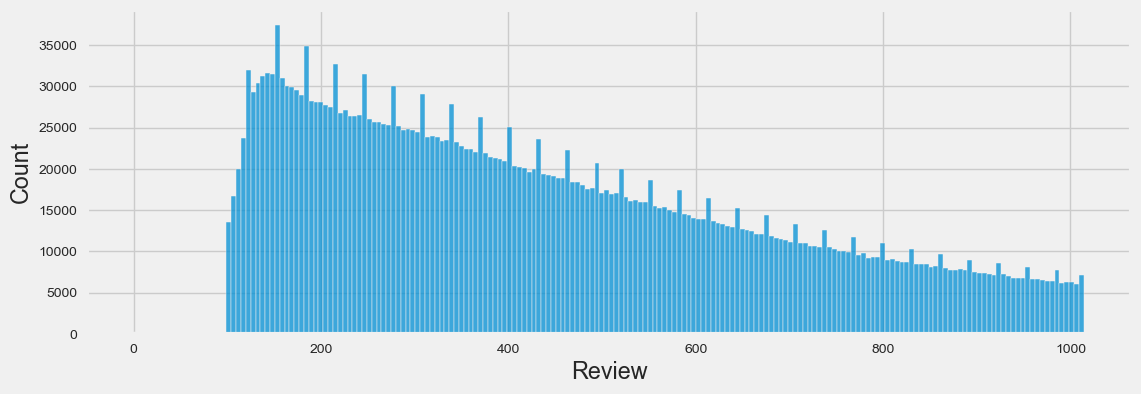

In [28]:
plt.figure(figsize=(12, 4))
sns.histplot(data=data, x=data['Review'].str.len(), palette=palette)
plt.show()

Sampling the data:
Since there are over 35 million reviews in this dataset, we will only use a portion of this for training our models. We will use Stratified Shuffle Split for this.

Benefits of StratifiedShuffleSplit:

Maintains class balance: This is crucial for sentiment analysis where you have different classes representing positive, negative, and neutral reviews. Stratified sampling ensures the sampled data reflects the same proportion of each class as your original dataset, preventing biases in your model's training.
Reduces computational cost: Training on a smaller sample is significantly faster and less resource-intensive compared to using the entire dataset.
Provides representative data: Stratified sampling ensures the selected data is representative of the entire population, leading to a more robust and generalizable model.

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
split = StratifiedShuffleSplit(n_splits=1, test_size=0.97)
for train_index, test_index in split.split(data, data["Sentiment"]): 
    strat_data = data.reindex(train_index)

In [30]:
strat_data.head(10)

,Review,Rating,Sentiment
1685027,Ok read This was an ok read. I enjoyed the mai...,3,Neutral
159041,powerful~dark comedy that is uncannily real I ...,5,Positive
2105442,Great for beginners This is a great book for b...,4,Positive
382094,RATHER PATHETIC The protagonist Gordon Comstoc...,3,Neutral
503387,SOMETHING BEYOND THE RETRO FASHION FEST WOULD'...,2,Negative
102260,WideScreen is no screen I don't understand thi...,1,Negative
2223405,Stash fails splendidly this time. The flavors ...,2,Negative
2102727,Brilliant and well presented overview ! Really...,4,Positive
1288211,Priced right I was surprised how large this sc...,4,Positive
2118047,what climax? Very strange book indeed. One of ...,2,Negative


We take a sample dataset of 75000 rows.

In [31]:
strat_data.shape

(90000, 3)

In [32]:
strat_data.value_counts("Sentiment")

Sentiment
Negative    36000
Positive    36000
Neutral     18000
Name: count, dtype: int64

Cleaning data:
Cleaning data includes

Tokenization: Tokenization is the process of converting text into tokens before transforming it into vectors.
Stop Words Removal: Stop words are the most commonly occuring words which are not relevant in the context of the data and do not contribute any deeper meaning to the phrase.
Normalization: Words which look different due to casing or written another way but are the same in meaning need to be process correctly. Normalisation processes ensure that these words are treated equally. This includes:
Casing the characters: Converting character to the same case so the same words are recognised as the same. In this case we converted to lowercase
Negation Handling
Lemmetization: This process finds the base or dictionary form of the word known as the lemma.

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
def preprocess_text(text):
    # Make text lowercase and remove links, text in square brackets, punctuation, and words containing numbers
    text = str(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*', ' ', text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words).strip()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(lem_tokens)

for example


In [35]:
import nltk

# Download necessary corpora
nltk.download('punkt')         # for word_tokenize
nltk.download('stopwords')     # for stopwords
nltk.download('wordnet')       # for WordNetLemmatizer
nltk.download('omw-1.4')       # lemmatizer support files

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
def preprocess_text(text):
    # Make text lowercase and remove links, text in square brackets, punctuation, and words containing numbers
    text = str(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*', ' ', text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words).strip()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(lem_tokens)

In [37]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [38]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:
preprocess_text(data["Review"][2])

'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny'

In [40]:
preprocess_text(data["Review"][110])

'fabulous book completely instrumental guiding husband timberframing pursuit read much cover binding fallen broken hold best reference diyer look starting structure'

In [41]:
strat_data["Review"] = strat_data["Review"].apply(preprocess_text)
print(strat_data.head(10))

                                                    Review  Rating Sentiment
1685027  ok read ok read enjoyed main character matthew...       3   Neutral
159041   powerful dark comedy uncannily real finished v...       5  Positive
2105442  great beginner great book beginner investor wa...       4  Positive
382094   rather pathetic protagonist gordon comstock ra...       3   Neutral
503387   something beyond retro fashion fest would nice...       2  Negative
102260   widescreen screen understand whole widescreen ...       1  Negative
2223405  stash fails splendidly time flavor immediately...       2  Negative
2102727  brilliant well presented overview really great...       4  Positive
1288211  priced right surprised large scope actually lo...       4  Positive
2118047  climax strange book indeed one favorite koontz...       2  Negative


Word Cloud:

In [42]:
txt = "".join(strat_data["Review"].tolist())

In [43]:
len(txt)

24010471

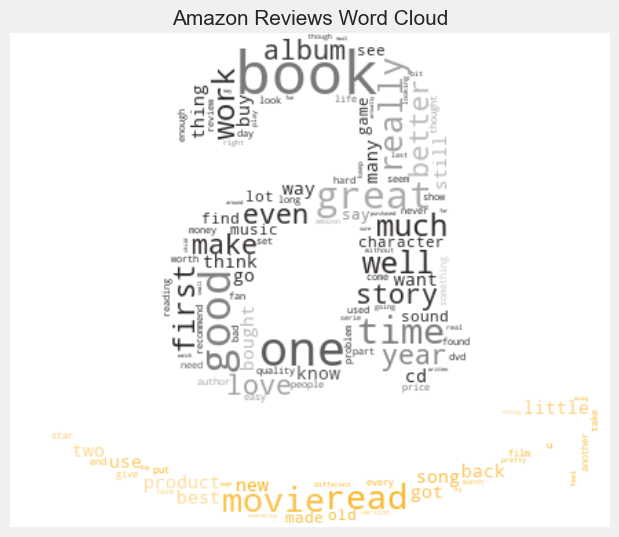

In [44]:
amazon_mask = np.array(Image.open(requests.get('https://pngimg.com/uploads/amazon/amazon_PNG4.png', stream=True).raw))

wc = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=amazon_mask).generate(txt)
image_colors = ImageColorGenerator(amazon_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.title("Amazon Reviews Word Cloud", fontsize = 15)
plt.savefig('wordcloud.png')
plt.show()

Vectorization:
Count Vectorization:

Count vectoriser transforms a given text into a vector on the basis of the frequency of each word that occurs in the entire text. It is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors

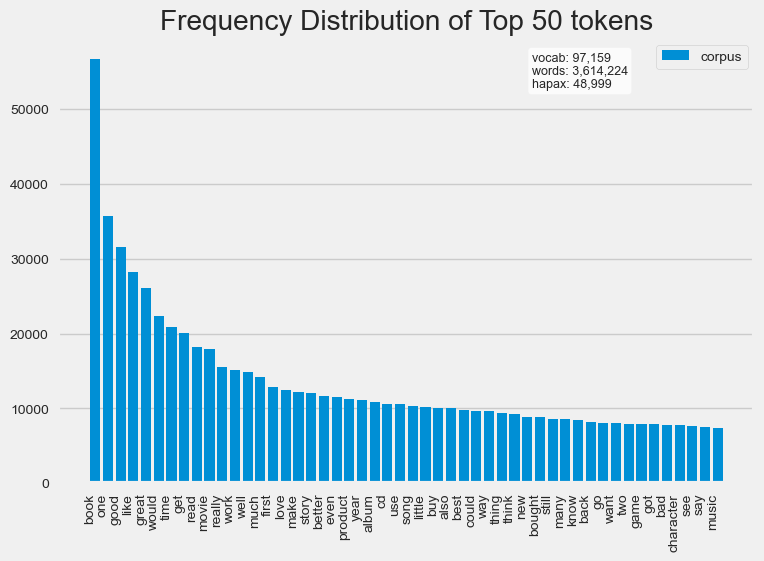

In [45]:
def word_distribution(text):
    vectorizer = CountVectorizer()
    docs = vectorizer.fit_transform(text)
    features = vectorizer.get_feature_names_out()
    
    # Freq Dist Visualizer
    visualizer = FreqDistVisualizer(features=features, orient='v')
    visualizer.fit(docs)
    visualizer.show()

word_distribution(strat_data['Review'])

TF-IDF Vectorizer:

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

In [46]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))

In [47]:
X_tfidf = tfidf_vectorizer.fit_transform(strat_data['Review'])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2799029 stored elements and shape (90000, 5000)>

In [48]:
X_tfidf.shape

(90000, 5000)

In [49]:
y = strat_data["Sentiment"]
y.shape

(90000,)

Training the model using Logistic Regression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 42,test_size = 0.20)

In [51]:
print(X_train.shape)
print(f"Number of Training Samples: {X_train.shape[0]}")
print(y_train.shape)
print(f"Number of Training Samples: {X_train.shape[0]}")
print(X_test.shape)
print(f"Number of Training Samples: {X_train.shape[0]}")
print(y_test.shape)
print(f"Number of Training Samples: {X_train.shape[0]}")

(72000, 5000)
Number of Training Samples: 72000
(72000,)
Number of Training Samples: 72000
(18000, 5000)
Number of Training Samples: 72000
(18000,)
Number of Training Samples: 72000


In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictedLogReg = logreg.predict(X_test)
np.mean(predictedLogReg == y_test)

np.float64(0.7093888888888888)

In [54]:
inp_test = input("Enter review: ")
print(inp_test)

inp_test = preprocess_text(inp_test)
print("After preprocessing: ", inp_test)

inp_test = tfidf_vectorizer.transform([inp_test])
logreg.predict(inp_test)

Enter review:  i hate thiss


i hate thiss
After preprocessing:  hate thiss


array(['Negative'], dtype=object)

i hate thiss
After preprocessing:  hate thiss

In [55]:
import numpy as np

result = np.array(['Negative'], dtype=object)
print(result)

['Negative']


Model Analysis:

In [56]:
# classification_report and accuracy_score using sklearn.metrics library
print("Classification Report")
print(f"{classification_report(y_test, predictedLogReg)}")
print(f"Accuracy: {accuracy_score(y_test, predictedLogReg)}")

Classification Report
              precision    recall  f1-score   support

    Negative       0.73      0.82      0.77      7058
     Neutral       0.48      0.27      0.35      3616
    Positive       0.75      0.82      0.78      7326

    accuracy                           0.71     18000
   macro avg       0.65      0.64      0.63     18000
weighted avg       0.69      0.71      0.69     18000

Accuracy: 0.7093888888888888


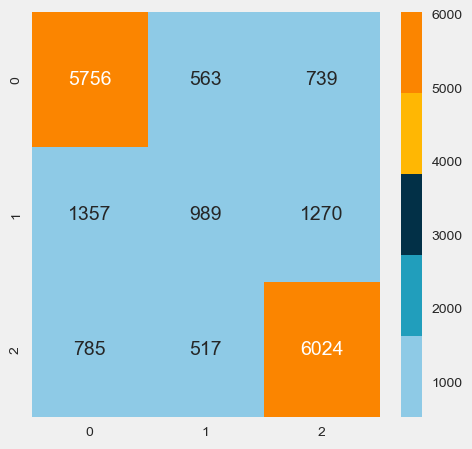

In [57]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,predictedLogReg), annot=True, fmt="d", cmap=colors)
plt.show()

In [58]:
cm = confusion_matrix(y_test,predictedLogReg)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5756  563  739]
 [1357  989 1270]
 [ 785  517 6024]]

True Positives(TP) =  5756

True Negatives(TN) =  989

False Positives(FP) =  563

False Negatives(FN) =  1357


In [59]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [60]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy of LG: {0:0.4f}'.format(classification_accuracy))

Classification accuracy of LG: 0.7784


Classification accuracy of LG: 0.7731

In [61]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error of LG: {0:0.4f}'.format(classification_error))

Classification error of LG: 0.2216


Classification error of LG: 0.2269

In [62]:
precision = TP / float(TP + FP)
print('Precision of LG: {0:0.4f}'.format(precision))


Precision of LG: 0.9109


Precision of LG: 0.9103

In [63]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity of LG: {0:0.4f}'.format(recall))


Recall or Sensitivity of LG: 0.8092


Recall or Sensitivity of LG: 0.8046

In [64]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.12067567, 0.1307528 , 0.74857153],
       [0.04771315, 0.12759609, 0.82469076],
       [0.27093796, 0.46650633, 0.26255571],
       [0.68596137, 0.14087041, 0.17316822],
       [0.01891417, 0.05409237, 0.92699346],
       [0.8398099 , 0.1455879 , 0.01460221],
       [0.98738989, 0.00949171, 0.0031184 ],
       [0.04124338, 0.06530343, 0.89345319],
       [0.62456595, 0.1535731 , 0.22186095],
       [0.47755415, 0.46435917, 0.05808668]])

In each row, the numbers sum to 1.
There are 3 columns which correspond to 3 classes - positive, negative, neutral
predict_proba process:
    Predicts the probabilities --> Choose the class with the highest probability

In [65]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Negative (0)', 'Prob of - Neutral (1)', 'Prob of - Positive (2)'])
y_pred_prob_df

,Prob of - Negative (0),Prob of - Neutral (1),Prob of - Positive (2)
0,0.120676,0.130753,0.748572
1,0.047713,0.127596,0.824691
2,0.270938,0.466506,0.262556
3,0.685961,0.140870,0.173168
4,0.018914,0.054092,0.926993
5,0.839810,0.145588,0.014602
6,0.987390,0.009492,0.003118
7,0.041243,0.065303,0.893453
8,0.624566,0.153573,0.221861
9,0.477554,0.464359,0.058087


Training the model using SVM:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state = 42, test_size = 0.20)

In [67]:
print(f"Training:\n X = {X_train.shape}\n y = {y_train.shape}")
print(f"Testing:\n X = {X_test.shape}\n y = {y_test.shape}")

Training:
 X = (72000, 5000)
 y = (72000,)
Testing:
 X = (18000, 5000)
 y = (18000,)


Training:
 X = (72000, 5000)
 y = (72000,)
Testing:
 X = (18000, 5000)
 y = (18000,)

In [68]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)*100

In [ ]:
inp_test = input("Enter review: ")
print(inp_test)

inp_test = preprocess_text(inp_test)
print("After preprocessing: ", inp_test)

inp_test = tfidf_vectorizer.transform([inp_test])
svm.predict(inp_test)

this is a good product
After preprocessing:  good product

Model Analysis:

In [ ]:
# classification_report and accuracy_score using sklearn.metrics library
print("Classification Report")
print(f"{classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=colors)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy of SVM: {0:0.4f}'.format(classification_accuracy))

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error of SVM: {0:0.4f}'.format(classification_error))

In [ ]:
precision = TP / float(TP + FP)
print('Precision of SVM: {0:0.4f}'.format(precision))

In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity of SVM: {0:0.4f}'.format(recall))

Exporting the models as a pickled file:

In [ ]:
pi = {'vectorizer': tfidf_vectorizer, 'logreg': logreg, 'svm': svm}
pickle.dump(pi, open('models' + '.p', 'wb'))

In [1]:
print("Testing file save")

Testing file save
